In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
import pandas as pd
import geojsonio
import folium
import shapely
import altair as alt

In [31]:
data = pd.read_csv('C:/Users/gianl/Capstone/Mangiapane_Gianluca_PythonPredictor/raw_data/PythonSightings.csv')
data.head()

,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,TreatComm,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm
0,97627,Skip Snow Everglades National Park,General Public,Python molurus ssp. bivittatus,Burmese python,Introduced,Detected,Positive,5/20/2008,5/23/2008,...,NaN,"""Skip Snow, National Park Service, personal co...","""Everglades National Park, Paurotis Pond""","""Matt Brien, University of Florida, stopped by...",NaN,NaN,Voucher Photographs,Verified,Verified,NaN
1,145991,Skip Snow Everglades National Park,General Public,Python molurus ssp. bivittatus,Burmese python,Introduced,Detected,Positive,6/24/2008,6/30/2008,...,NaN,"""Skip Snow, National Park Service, personal co...","""Key Largo, vicinity of Overseas Highway and F...","""At about 1:10 pm on Tuesday, 24 June 2008, th...",NaN,NaN,Voucher Specimens,Verified,Verified,NaN
2,414849,Skip Snow Everglades National Park,General Public,Python molurus ssp. bivittatus,Burmese python,Introduced,Detected,Positive,12/1/2008,12/3/2008,...,NaN,"""Skip Snow, National Park Service, personal co...","""Spruce Creek, Kendrew Dr appx 130 m N of Bogg...","""Observed on a forested private lot behind a r...",NaN,NaN,NaN,Verified,Credible,NaN
3,446320,Michael Renda The Nature Conservancy,General Public,Python molurus ssp. bivittatus,Burmese python,Introduced,Detected,Positive,10/15/2008,3/7/2010,...,NaN,"""Michael Renda, The Nature Conservancy, person...","""Jupiter, Sierra Square 9250 W Indiantown Rd""","""I did not observe this, but spoke to the anim...",NaN,NaN,Specimens,Verified,Verified,NaN
4,462630,Jeffrey Carter Rookery Bay NERR,General Public,Python molurus ssp. bivittatus,Burmese python,Introduced,Detected,Positive,12/27/2008,12/30/2008,...,NaN,"""Jeffrey Carter, Rookery Bay National Estuarin...","""Collier County, Hyw 951 appx 200m S of Shell ...",NaN,NaN,NaN,Voucher Photographs,Verified,Verified,NaN


In [32]:
data.columns

Index(['objectid', 'reporter', 'RecOwner', 'SciName', 'ComName', 'Nativity',
       'OccStatus', 'Status', 'ObsDate', 'DateEnt', 'DateUp', 'Location',
       'Latitude', 'Longitude', 'Datum', 'Method', 'CoordAcc', 'DataType',
       'Centroid', 'Abundance', 'InfestAcre', 'GrossAcre', 'Percentcov',
       'Density', 'Quantity', 'QuantityU', 'APPXQuant', 'NumCollect',
       'Smallest', 'Largest', 'Incidence', 'Severity', 'Host', 'Host_Name',
       'HostPheno', 'HostDamage', 'ManageStat', 'PopStat', 'Habitat',
       'LocalOwner', 'Site', 'RecBasis', 'Museum', 'MuseumRec', 'Voucher',
       'ObsIDer', 'CollectTme', 'UUID', 'OrgSrcID', 'OrigName', 'RecSrcTyp',
       'Surveyor', 'DateAcc', 'VisitType', 'DataMthd', 'TrapType', 'NumTraps',
       'TargetName', 'TargetCnt', 'TargetRnge', 'Phenology', 'LifeStatus',
       'Sex', 'PID', 'WaterName', 'WaterType', 'Substrate', 'TreatArea',
       'PlantTreat', 'TreatComm', 'Reference', 'Locality', 'Comments',
       'ReviewDate', 'Reviewer', 'V

In [33]:
data = data.dropna(subset=['Latitude', 'Longitude'])

In [34]:
data["Coordinates"] = gpd.points_from_xy(data["Longitude"], data["Latitude"])

In [35]:
gdata = gpd.GeoDataFrame(data, geometry="Coordinates", crs="EPSG:4326")

In [36]:
pythons = gdata[['Coordinates']]

pythons.head()

,Coordinates
0,POINT (-80.79981 25.28243)
1,POINT (-80.45266 25.08408)
2,POINT (-81.01820 29.09441)
3,POINT (-80.17971 26.93767)
4,POINT (-81.70120 26.02109)


In [37]:
pythons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7217 entries, 0 to 7590
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Coordinates  7217 non-null   geometry
dtypes: geometry(1)
memory usage: 112.8 KB


In [38]:
counties = gpd.read_file('raw_data/geojson-fl-counties-fips.json')
counties = counties.to_crs(epsg=4326)

counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021..."
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ..."
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682..."
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448..."
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820..."
...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.67210, -83.88032 30.665..."
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634..."
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-82.40515 29.33026, -82.40459 29.278..."
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-81.56376 26.51332, -81.27177 26.517..."


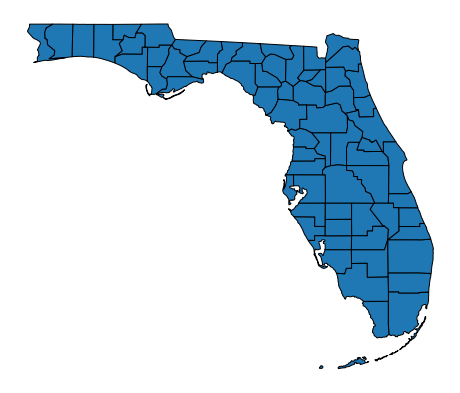

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = counties.plot(ax=ax, edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

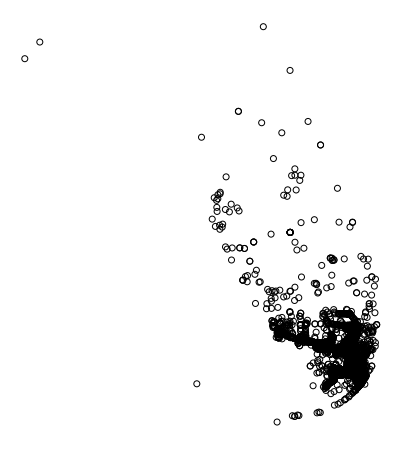

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = pythons.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

In [45]:
pythons.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
joined = gpd.sjoin(pythons, counties, predicate='within', how='left')

joined.head()

,Coordinates,index_right,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA
0,POINT (-80.79981 25.28243),57.0,12086,0500000US12086,12,086,Miami-Dade,County,1897.716
1,POINT (-80.45266 25.08408),1.0,12087,0500000US12087,12,087,Monroe,County,983.282
2,POINT (-81.01820 29.09441),23.0,12127,0500000US12127,12,127,Volusia,County,1101.032
3,POINT (-80.17971 26.93767),16.0,12099,0500000US12099,12,099,Palm Beach,County,1969.763
4,POINT (-81.70120 26.02109),65.0,12021,0500000US12021,12,021,Collier,County,1998.324


In [48]:
len(joined)

7217

In [49]:
grouped = joined.groupby('NAME', as_index=False)

count = grouped['Coordinates'].count()

count

,NAME,Coordinates
0,Alachua,2
1,Brevard,3
2,Broward,545
3,Charlotte,9
4,Collier,1032
5,Duval,1
6,Flagler,1
7,Glades,6
8,Hardee,1
9,Hendry,15


In [50]:
count = count.rename(columns={"Coordinates": "Sightings"})

count.sort_values(by='Sightings', ascending=False)



,NAME,Sightings
20,Miami-Dade,4827
4,Collier,1032
2,Broward,545
21,Monroe,517
25,Palm Beach,53
15,Lee,16
9,Hendry,15
28,Polk,11
17,Manatee,10
3,Charlotte,9


In [51]:
reports = counties.merge(count, on='NAME')

reports.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Sightings
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021...",2
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ...",517
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682...",6
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448...",3
4,12001,0500000US12001,12,001,Alachua,County,875.020,"POLYGON ((-82.55651 29.51198, -82.65630 29.564...",2


In [52]:
# Convert median values to EPSG=4326
reports_4326 = reports.to_crs(epsg=4326)

# Plot the map
chart = (
    alt.Chart(reports_4326)
    .mark_geoshape(stroke="white")
    .encode(
        tooltip=["Sightings:Q", "NAME:N"],
        color=alt.Color("Sightings:Q", scale=alt.Scale(scheme='viridis'))
    ).properties(width=500, height=400)
)

chart

alt.Chart(...)

In [53]:
before2000 = data[data["ObsDate"] < '01/01/2000']

In [54]:
before2000.head()

,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,Coordinates
